In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm

dirpath = "C:\\Users\\tejad\\OneDrive\\Desktop\\semester 6\\DLS\\EndSem\\floodDetector\\floodDetector\\CNN_dl\\"
dirname = ["Flooded","Nonflooded"]
import os
for dirname, _, filenames in os.walk(dirpath):
    print(f"[INFO] importing directory: {dirname}\n")
    with tqdm(total=len(filenames)) as t:
        for filename in filenames:
            t.update(1)
            

[INFO] importing directory: C:\Users\tejad\OneDrive\Desktop\semester 6\DLS\EndSem\floodDetector\floodDetector\CNN_dl\



0it [00:00, ?it/s]


[INFO] importing directory: C:\Users\tejad\OneDrive\Desktop\semester 6\DLS\EndSem\floodDetector\floodDetector\CNN_dl\flooded



100%|██████████| 289/289 [00:00<?, ?it/s]


[INFO] importing directory: C:\Users\tejad\OneDrive\Desktop\semester 6\DLS\EndSem\floodDetector\floodDetector\CNN_dl\nonflooded



100%|██████████| 294/294 [00:00<?, ?it/s]


In [5]:
import tensorflow as tf
from keras.models import Model

from tqdm import tqdm
from skimage.color import rgb2gray as rtg
from skimage.io import imread, imshow
from skimage import io
io.use_plugin('matplotlib')
from skimage.transform import resize
import matplotlib.pyplot as plt
from skimage.morphology import label
from PIL import Image

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Reshape
from tensorflow.keras.initializers import glorot_uniform

In [6]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [7]:
imagesPath = dirpath + "flooded"
masksPath = dirpath + "nonflooded"

In [8]:
images_ids = next(os.walk(imagesPath))[2]
masks_ids = next(os.walk(masksPath))[2]

In [9]:
print(f"Total floodedimages: {len(images_ids)}\nTotal nonfloodedimages : {len(masks_ids)}")

Total floodedimages: 289
Total nonfloodedimages : 294


In [10]:
N = 256

In [11]:
X = np.zeros((len(images_ids), N, N, 3), dtype=np.uint8)
Y = np.zeros((len(masks_ids), N, N, 1), dtype=np.bool_)

In [12]:
print("Resizing training images and masks")
for n, id_ in tqdm(enumerate(images_ids), total=len(images_ids)):
    path = imagesPath + "/" + id_
    img = Image.open(path)
    img = np.array(img)
    img = resize(img, (N, N, 3), mode="constant", preserve_range=True)
    X[n] = img


Resizing training images and masks


  0%|          | 0/289 [00:00<?, ?it/s]

100%|██████████| 289/289 [01:33<00:00,  3.11it/s]


In [14]:
for m, id__ in tqdm(enumerate(masks_ids), total=len(masks_ids)):
    mask = np.zeros((N, N, 1), dtype=np.bool_)
    mask_path = os.path.join(masksPath, id__)
    mask = imread(mask_path)
    mask = mask[:, :, 0]  # Select the first channel to create a grayscale mask
    mask = np.expand_dims(resize(mask, (N, N), mode="constant", preserve_range=True), axis=-1)
    Y[m] = mask


  0%|          | 0/294 [00:00<?, ?it/s]

100%|██████████| 294/294 [06:53<00:00,  1.41s/it]


In [15]:
print(f"X.shape: {X.shape}\nY.shape: {Y.shape}")

X.shape: (289, 256, 256, 3)
Y.shape: (294, 256, 256, 1)


12


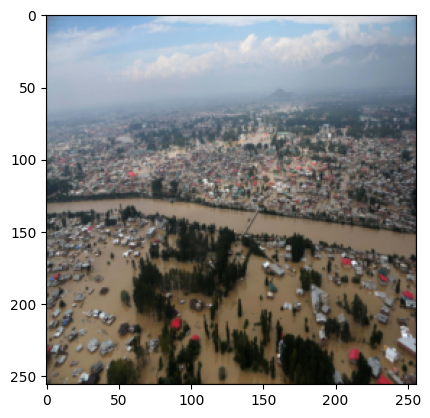

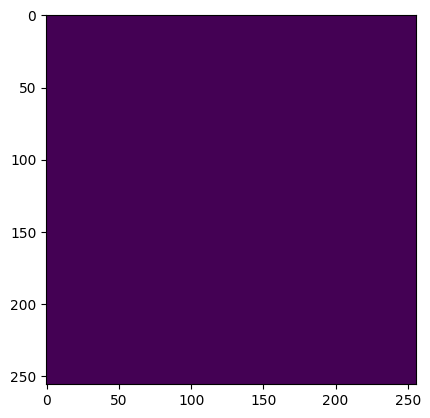

In [16]:
import random
io.use_plugin('matplotlib')
image_x = 12
print(image_x)
plt.imshow(X[image_x])
plt.show()
plt.imshow((Y[image_x]))
plt.show()

In [24]:
# The custom U-Net Architecture

# Input image
input = tf.keras.layers.Input(X(n))

# reduce image config
s = tf.keras.layers.Lambda(lambda x: x / N)(input)

# block 1
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

# block 2
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

# block 3
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
c3  = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

# block 4
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

# block 5
c5 = tf.keras.layers.Conv2D(N, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Conv2D(N, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(N, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
p5 = tf.keras.layers.MaxPooling2D((2, 2))(c5)

# block 6
c6 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p5)
c6 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
c6 = tf.keras.layers.Dropout(0.3)(c6)
c6 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

# block 7 - back 1
u7 = tf.keras.layers.Conv2DTranspose(N, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c5])
c7 = tf.keras.layers.Conv2D(N, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Conv2D(N, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
c7 = tf.keras.layers.Dropout(0.3)(c7)
c7 = tf.keras.layers.Conv2D(N, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

# block 8 - back 2
u8 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c4])
c8 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

# block 9 - back 3
u9 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c3])
c9 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

# block 10 - back 4
u10 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c9)
u10 = tf.keras.layers.concatenate([u10, c2])
c10 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u10)
c10 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c10)
c10 = tf.keras.layers.Dropout(0.1)(c10)
c10 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c10)

# block 11 - back 5
u11 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c10)
u11 = tf.keras.layers.concatenate([u11, c1])
c11 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u11)
c11 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c11)
c11 = tf.keras.layers.Dropout(0.1)(c11)
c11 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c11)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c11)

modelUNet = tf.keras.Model(inputs=input, outputs=outputs, name='U-NET')

modelUNet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

TypeError: 'numpy.ndarray' object is not callable

In [18]:
modelUNet.summary()

Model: "U-NET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [19]:
callbacks=[
#     tf.keras.callbacks.EarlyStopping(patience=2, monitor="val_loss"),
    tf.keras.callbacks.TensorBoard(log_dir="logs")]


# results = modelUNet.fit(X, Y, validation_split=0.1, batch_size=8, epochs=55, callbacks=callbacks)
results = modelUNet.fit(X, Y, validation_split=0.1, batch_size=8, epochs=1, callbacks=callbacks)


33/33 [==============================] - 149s 4s/step - loss: 0.2067 - accuracy: 0.9038 - val_loss: 3.6119e-25 - val_accuracy: 1.0000


In [21]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

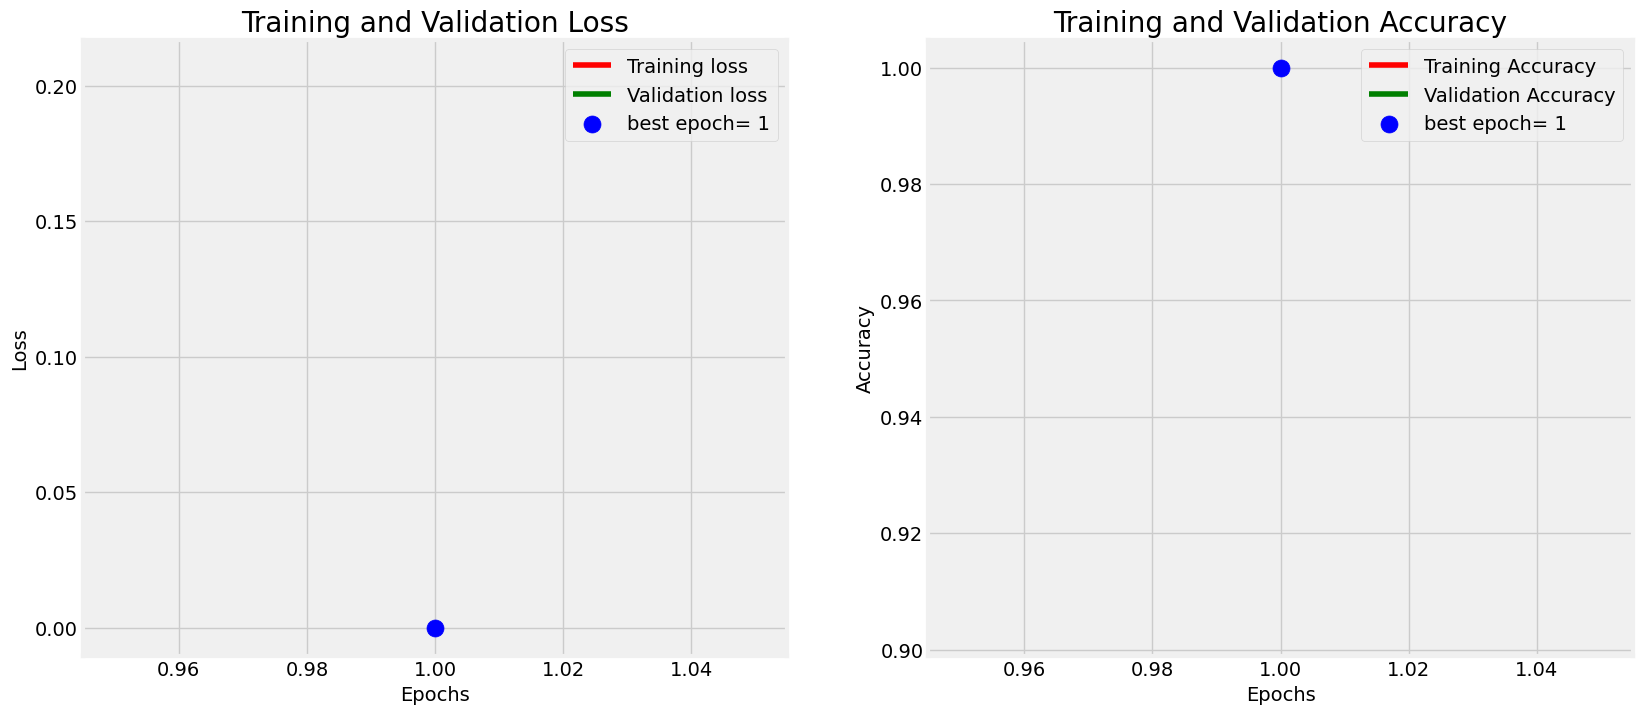

In [22]:
plot_training(results)

In [23]:
modelUNet.evaluate(X, Y)

ValueError: Data cardinality is ambiguous:
  x sizes: 289
  y sizes: 294
Make sure all arrays contain the same number of samples.

In [19]:
modelUNet.save("unetModel")

INFO:tensorflow:Assets written to: unetModel\assets


INFO:tensorflow:Assets written to: unetModel\assets


In [20]:
global model
model = tf.keras.models.load_model("unetModel")

<Figure size 3000x3000 with 0 Axes>

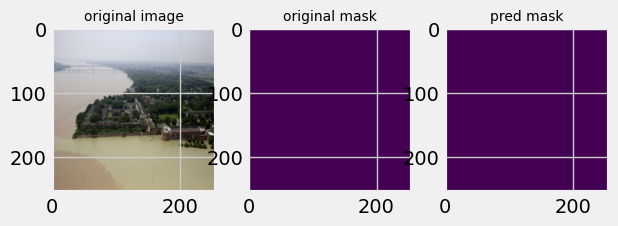

In [21]:
plt.figure(figsize=(30,30))

ind = random.randint(0, len(X))
img = X[ind]
predMask = modelUNet.predict(np.expand_dims(img, axis=0), verbose=0)
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("original image", fontdict = {'fontsize' : 10})
ax1.imshow(X[ind])
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("original mask", fontdict = {'fontsize' : 10})
ax2.imshow(np.squeeze(Y[ind]))
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("pred mask", fontdict = {'fontsize' : 10})
ax3.imshow(np.squeeze(predMask))

In [22]:
def out_preds(dir_path,model):
    for i in os.listdir(dir_path):
        img = Image.open(dir_path + i)
        img = np.array(img)
        img = resize(img, (256, 256, 3), mode="constant", preserve_range=True)
        predMask = model.predict(np.expand_dims(img, axis=0),verbose=0)
        fig = plt.figure(figsize=(50,50))
        plt.axis("off");
        plt.imshow(np.squeeze(predMask))
        plt.savefig(f"video_process/predicted_top_masks/{i}")
        

In [23]:
inf_path ="C:\\Users\\tejad\\Downloads\\Dataset_flood"
out_preds(inf_path, model)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\tejad\\Downloads\\Dataset_flood'

In [19]:
import cv2

# Load the masked image
masked_img = cv2.imread('12.png', 0) # Set the second argument to 0 to read the image as grayscale

# Calculate the total number of pixels in the masked image
total_pixels = masked_img.shape[0] * masked_img.shape[1]

# Count the number of pixels that are not equal to zero (i.e., masked)
masked_pixels = cv2.countNonZero(masked_img)

# Calculate the percentage of masked area
percent_masked = (masked_pixels / total_pixels) * 100

print('Percentage of masked area: {:.2f}%'.format(percent_masked))


AttributeError: 'NoneType' object has no attribute 'shape'